#### PRODUCT RECOMMENDATION CODE

This the code works to suggest products to users. The code uses a technique called content-based filtering, which means that it compares the features of the products that the user has viewed with the features of other products in the database. The code calculates the cosine similarity between the feature vectors of the products, which is a measure of how similar they are. The higher the cosine similarity, the more likely the user will be interested in that product. The code then sorts the products by their cosine similarity and returns the top ones as recommendations.

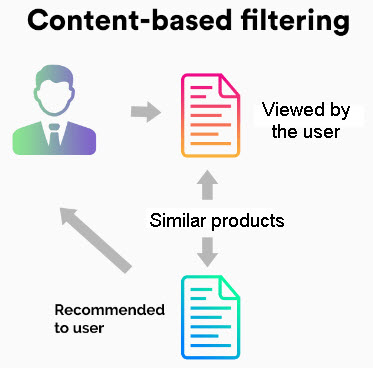

#### 0. SUMMARY

The code provided is a product recommendation algorithm that uses cosine similarity to recommend products to users based on the items they have viewed (Content-based filtering)

**Steps:**
- Load and clean the data.
- Finalize the columns for the product recommendation algorithm.
- Create a product list for cosine similarity.
- Convert the text in the product list to a word count matrix.
- Calculate the Cosine Similarity Matrix from the word counts matrix.
- Define a function to recommend products to users based on the items they have viewed.
- Select a user_id and get the product they have viewed.
- Recommend products to the user based on the product they have viewed.

**How it works:**
The algorithm works by first calculating the cosine similarity between all pairs of products in the product list. Cosine similarity is a measure of how similar two vectors are. In this case, the vectors are the word count matrices for each product.
Once the cosine similarity matrix has been calculated, the algorithm then uses it to recommend products to users. To do this, the algorithm first identifies the products that the user has viewed. Then, it finds the products that are most similar to the products the user has viewed. These are the products that the algorithm recommends to the user.

**Example:** 
The following example shows the final result of the code to recommend products to a user:

*“The user 512913767 viewed the item: "electronics.smartphone xiaomi", the recommended products are:

1 electronics.smartphone huawei


2 electronics.smartphone samsung


3 electronics.smartphone nokia”*

**This code increase sales on e-commerce websites:**

The code can be used to increase sales on e-commerce websites by recommending products to users based on the items they have viewed. This can be done by displaying the recommended products to the user on the product page, in the search results, or in the user's account area.
For example, an e-commerce website could display a section on the product page called "Recommended Products". This section could display the products that are most similar to the product the user is currently viewing.

The e-commerce website could also display the recommended products in the search results. When a user searches for a product, the website could display the recommended products below the search results.
Finally, the e-commerce website could display the recommended products in the user's account area. This could be done in a section called "My Recommendations".

By recommending products to users based on the items they have viewed, e-commerce websites can increase sales by making it easier for users to find the products they want to buy.

#### 1. LOAD DATA

In [1]:
#import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#load Data
df = pd.read_csv("2019-Oct.csv")
print('------------------')
print('Data Head Preview:')
print('------------------')
df.head(3)

------------------
Data Head Preview:
------------------


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8


In [3]:
#data review
print('----------------')
print('Data Information')
print('----------------')
df.info()

----------------
Data Information
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


#### 2. CLEANING DATA

In [4]:
print('--------------------------')
print('Percentage of Missing Data')
print('--------------------------')
100 * df.isnull().sum() / len(df)

--------------------------
Percentage of Missing Data
--------------------------


event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    31.839818
brand            14.410502
price             0.000000
user_id           0.000000
user_session      0.000005
dtype: float64

In [5]:
#percentage of missing value for 'user session' is less than 1%
#drop row where 'user_session' is missing data 
df = df.dropna(axis=0,subset='user_session')
print('---------------------------------------------------------------')
print('Rows with missing data in user_session was removed successfully')
print('---------------------------------------------------------------')

---------------------------------------------------------------
Rows with missing data in user_session was removed successfully
---------------------------------------------------------------


In [6]:
#to fill in the missing data in the 'category_code' column, the number in the 'category_id' column will be for reference.
#for each 'category_id' that is missing a 'category_code', we look up the 'category_id' with 'category_code' information in the same table.

#list of 'category_id' numbers with missing value in 'category_code'
catid_catcode_null = df[df['category_code'].isnull()]['category_id'].unique()
#list of 'category_id' numbers with value in 'category_code'
catid_catcode_notnull = df[df['category_code'].notnull()]['category_id'].unique()

#find 'category_id' numbers with 'category_code' information into the missing value 'category_code' list
catid_list = []
for catid in catid_catcode_notnull:
    if catid in catid_catcode_null:
        catid_list.append(catid)
if len(catid_list) > 0:
    print(catid_list)
    print('---------------------------------------------------------')
    print('category_id numbers with category_code information found!')
    print('---------------------------------------------------------')
else:
    print('------------------------------------------------------------')
    print('category_id numbers with category_code information not found')
    print('------------------------------------------------------------')

------------------------------------------------------------
category_id numbers with category_code information not found
------------------------------------------------------------


In [7]:
#No 'category_id' numbers found with information in 'category_code', to fill in missing data in 'category_code' column
#drop row where 'category_code' is missing data 
df = df.dropna(axis=0,subset='category_code')
print('----------------------------------------------------------------')
print('Rows with missing data in category_code was removed successfully')
print('----------------------------------------------------------------')

----------------------------------------------------------------
Rows with missing data in category_code was removed successfully
----------------------------------------------------------------


In [8]:
#to fill in the missing data in the 'brand' column, the number in the 'product_id' column will be for reference.
#for each 'product_id' that is missing a 'brand', we look up the 'product_id' with 'brand' information in the same table.

#list of 'product_id' numbers with missing value in 'brand'
proid_brand_null = df[df['brand'].isnull()]['product_id'].unique()
#list of 'product_id' numbers with value in 'brand'
proid_brand_notnull = df[df['brand'].notnull()]['product_id'].unique()

#find 'product_id' numbers with 'brand' information into the missing value 'brand' list
proid_list = []
for proid in proid_brand_notnull:
    if proid in proid_brand_null:
        proid_list.append(proid)
if len(proid_list) > 0:
    print(proid_list)
    print('------------------------------------------------')
    print('product_id numbers with brand information found!')
    print('------------------------------------------------')
else:
    print('---------------------------------------------------')
    print('product_id numbers with brand information not found')
    print('---------------------------------------------------')

[10200661, 53900008, 45601342, 16900229, 35200100, 35200054, 35200214, 35200400, 35200006, 6601031, 49800027, 5701375, 35200094, 49800021, 1003912, 49800025, 1003208, 3000140, 1307139, 4502653, 49800020, 1003209, 49800022, 49800023, 1307141, 30900189, 51000020, 4502658, 35200196, 35200213, 35200095, 35200096, 5701201, 4502656, 1307335, 2402969, 5701350, 1005178, 6200399, 1307437, 3601583, 2702611, 51000019, 3701087, 1005146, 2702610, 6200888, 6200677, 21411451, 4501738, 51000002, 35200194, 12202735, 2402999, 35700018, 35700019, 35200198, 1802051, 2402997, 2402998, 1004786, 4502660, 2402995, 11600326, 43200018, 2800448, 6201159, 4804572, 5100865, 1005187, 1005175, 6201160, 29502741, 6400370, 53900010, 4501894, 2800042, 5100864, 2800041, 4804574, 2800172, 6500897, 4501892, 2402993, 11700167, 14100591, 6400369, 12202777, 35102453, 12202779, 3100911, 45601351, 53900016, 6601049, 3701513, 1307439, 12202780, 21411448, 1701524, 6700910, 1802053, 2702615, 43200003, 11600350, 1802052, 43200007,

In [9]:
#DataFrame with brand not null 
df_with_brand = df[df['brand'].notnull()]
#DataFrame with brand null and the Product ID from proid_list
df_without_brand = df[df['brand'].isnull()].loc[df['product_id'].isin(proid_list)]
#brand dictionary creation
brand_dict = {}
for proid in proid_list:
    brand = df_with_brand[df_with_brand['product_id'] == proid]['brand'].values[0]
    brand_dict[proid] = brand
# Update the `brand` column in `df_nobrand` with the corresponding brand name from the dictionary.
df_without_brand['brand'] = df_without_brand['product_id'].apply(lambda x: brand_dict[x])
print('-----------------------------------')
print('Brand names completed successfully!')
print('-----------------------------------')

-----------------------------------
Brand names completed successfully!
-----------------------------------


In [10]:
#the remaining data missing in 'brand' does not have 'product_id' numbers to be identified
#drop row where 'brand' is missing data 
df = df.dropna(axis=0,subset='brand')
print('--------------------------------------------------------')
print('Rows with missing data in brand was removed successfully')
print('--------------------------------------------------------')

--------------------------------------------------------
Rows with missing data in brand was removed successfully
--------------------------------------------------------


In [11]:
#check the percentage of missing data
print('--------------------------')
print('Percentage of Missing Data')
print('--------------------------')
100 * df.isnull().sum() / len(df)

--------------------------
Percentage of Missing Data
--------------------------


event_time       0.0
event_type       0.0
product_id       0.0
category_id      0.0
category_code    0.0
brand            0.0
price            0.0
user_id          0.0
user_session     0.0
dtype: float64

#### 3. PRODUCT RECOMMENDATION ALGORITHM

3.1 Data preparation for the Product Recommendation Algorithm

In [12]:
#columns for the product recommendation algorithm
data = df[['event_type', 'category_code', 'brand', 'user_id']]
print('--------------------------------------------------------')
print('Columns for the product recommendation algorithm Preview')
print('--------------------------------------------------------')
data.head(3)

--------------------------------------------------------
Columns for the product recommendation algorithm Preview
--------------------------------------------------------


,event_type,category_code,brand,user_id
1,view,appliances.environment.water_heater,aqua,554748717
3,view,computers.notebook,lenovo,550050854
4,view,electronics.smartphone,apple,535871217


In [13]:
#Create a column to combine the information from the columns "product_id, category_code, brand"
data['product'] = data.apply(lambda row: f"{row['category_code']} {row['brand']}", axis=1)
print('-----------------------------------')
print('Column PRODUCT created Successfully')
print('-----------------------------------')
data.head(3)

-----------------------------------
Column PRODUCT created Successfully
-----------------------------------


/tmp/ipykernel_102400/1169526978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product'] = data.apply(lambda row: f"{row['category_code']} {row['brand']}", axis=1)


,event_type,category_code,brand,user_id,product
1,view,appliances.environment.water_heater,aqua,554748717,appliances.environment.water_heater aqua
3,view,computers.notebook,lenovo,550050854,computers.notebook lenovo
4,view,electronics.smartphone,apple,535871217,electronics.smartphone apple


In [14]:
#final columns for the product recommendation algorithm
data = data[['event_type', 'user_id', 'product']]
print('-------------------------------------------------------------------')
print('Final Columns data for the PRODUCT RECOMMENDATION ALGORITHM Preview')
print('-------------------------------------------------------------------')
data.head(3)

-------------------------------------------------------------------
Final Columns data for the PRODUCT RECOMMENDATION ALGORITHM Preview
-------------------------------------------------------------------


,event_type,user_id,product
1,view,554748717,appliances.environment.water_heater aqua
3,view,550050854,computers.notebook lenovo
4,view,535871217,electronics.smartphone apple


In [15]:
#Update the DataFrame with a unique combination of values among 'event_type','user_id' and 'product' columns
data = data.drop_duplicates(subset=['event_type',  'user_id', 'product'])
print('--------------------------------------------------')
print('DataFrame with a unique combination - Successfully')
print('--------------------------------------------------')

--------------------------------------------------
DataFrame with a unique combination - Successfully
--------------------------------------------------


3.2 Creating the Cosine Similarity Matrix

In [18]:
#creating a product list for cosine similarity
product_list = data['product'].copy()
#dropping duplicate values
product_list = product_list.drop_duplicates()
#reseting the index
product_list = product_list.reset_index(drop=True)
print('---------------------------------')
print('Product list created Successfully')
print('---------------------------------')

---------------------------------
Product list created Successfully
---------------------------------


In [19]:
#convert the text in the product list to a word counts matrix (wcm)
wcm = CountVectorizer().fit_transform(product_list)
#Cosine Similarity Matrix (csm) from the word counts matrix (wcm)
csm = cosine_similarity(wcm)
print('---------------------------------------------')
print('Cosine Similarity Matrix created Successfully')
print('---------------------------------------------')

---------------------------------------------
Cosine Similarity Matrix created Successfully
---------------------------------------------


3.3 create a function to determine the recommended product for a specific user

In [20]:
def recommend_product(user_id):
    #viewed products
    viewed_products = data['product'][data['user_id'] == user_id]
    #viewed products list (vpl)
    vpl = []
    for y in viewed_products:
        vpl.append(y)
    #product viewed
    product_viewed = viewed_products.values[0]

    #index of the product viewed in the product list
    prod_index = product_list[product_list==product_viewed].index[0]

    #recommended product list
    recommended_products_score = list(enumerate(csm[prod_index]))
    sorted_recommended_products = sorted(recommended_products_score, key=lambda x:x[1], reverse=True)
    sorted_recommended_products = sorted_recommended_products[1:]
    recomm_prod_list = []
    for x in sorted_recommended_products:
        if product_list[x[0]] in vpl:
            continue
        else:
            recomm_prod_list.append(product_list[x[0]])
    
    return recomm_prod_list[:3]

3.4 Running function to determine recommended product for a specific user

In [42]:
# Select a random user_id
import random
user_id = random.choice(data["user_id"])

#product viewed
product_viewed = (data['product'][data['user_id'] == user_id]).values[0]

#PRODUCTS RECOMMENDATION
print('The user {} viewed the item: \"{}\", the recommended products are:\n'.format(user_id, product_viewed))
# print()
# print('The recommended product are:\n')
j=0
for item in recommend_product(user_id):
    print(j+1, item)
    j += 1

The user 512913767 viewed the item: "electronics.smartphone xiaomi", the recommended product are:

1 electronics.smartphone huawei
2 electronics.smartphone samsung
3 electronics.smartphone nokia


#### 4. CONCLUSION

The code provided is a simple but effective product recommendation algorithm that uses cosine similarity to recommend products to users based on the items they have viewed. It is easy to implement and can be used to increase sales on e-commerce websites by making it easier for users to find the products they want to buy.

Here are some specific benefits of using this algorithm:

- It is personalized to each user's individual interests, based on the products they have viewed in the past.
- It is scalable to large datasets of products and users.
- It is efficient to compute, making it suitable for real-time recommendations.
- It is simple to implement and maintain.

Overall, the code provided is a valuable tool for e-commerce websites that want to improve their product recommendation system and increase sales.